In [3]:
from pathlib import Path
import glob
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import os
import math

catalog=Path('output')
assert(catalog.is_dir())
files=glob.glob(str(catalog.joinpath("*rmsd.txt")))

all_rmsds = []
rmsd_cat = []
name_cat = []

for file in files:    
    rmsds=[]
    name = os.path.basename(file)
    #print(file)
    with open(file) as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")
        for line in tsvreader:
            rmsds.append(float(line[0]))
            all_rmsds.append(float(line[0]))
    rmsd_cat.append(rmsds)
    name_cat.append(name)
            
freq_cf = 5
r=(0,math.ceil(max(all_rmsds))+1)
num_bins = (r[1]-r[0])*freq_cf

plots = []
all_bcy = np.zeros(num_bins)
for rmsds, name in zip(rmsd_cat,name_cat):
    h = np.histogram(rmsds,num_bins,r)
    bcy = (h[0]/np.sum(h[0]))
    bcx = [x for x in h[1][:-1]]
    all_bcy+=bcy
    

    
all_bcy /= len(files)




    

# Histogram of RMSD (Normalized)

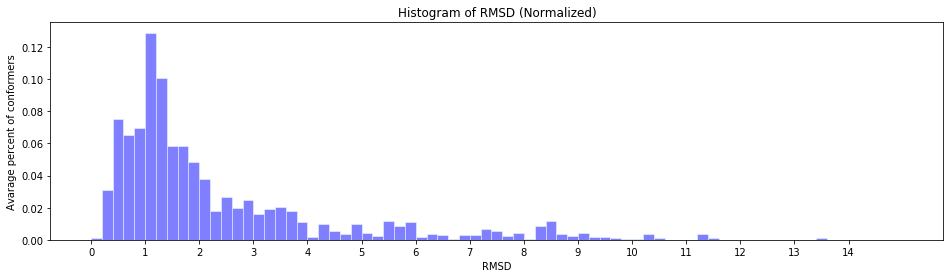

In [4]:
plt.figure(figsize=(16, 4))
plt.xticks(range(0,r[1]))
plt.bar(bcx, all_bcy,facecolor='blue', alpha=0.5,align = 'edge',width=1/freq_cf,edgecolor = 'azure')
plt.title(r'Histogram of RMSD (Normalized)')
plt.ylabel('Avarage percent of conformers')
plt.xlabel('RMSD')
plt.show()
    

In [5]:
# plt.figure(figsize=(16, 4))
# plt.xticks(range(0,r[1]))
# n, bins, patches = plt.hist(all_rmsds, num_bins, facecolor='blue', alpha=0.5,range=r,edgecolor = 'azure')
# plt.title(r'Histogram of RMSD (Absolute)')
# plt.ylabel('Num of conformers')
# plt.xlabel('RMSD')
# plt.show()

## Histograms by cases

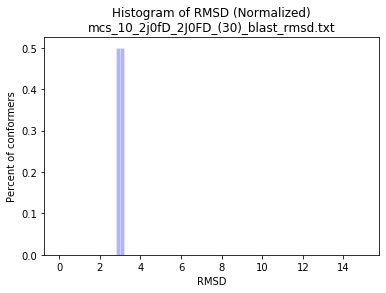

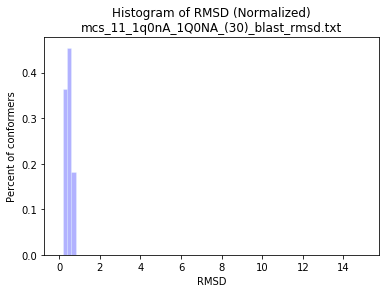

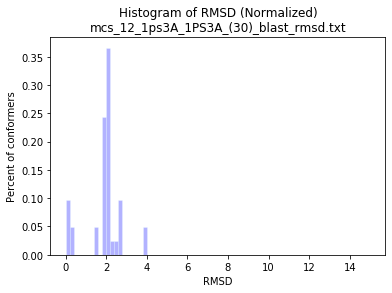

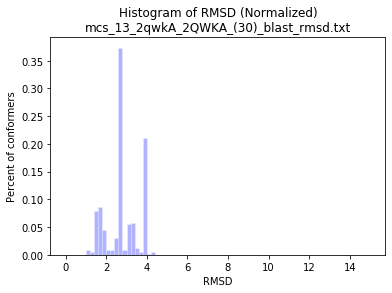

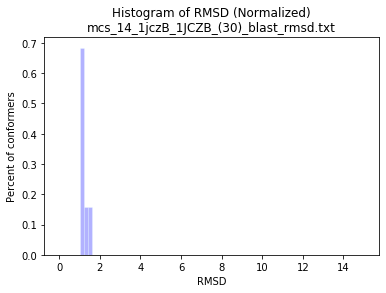

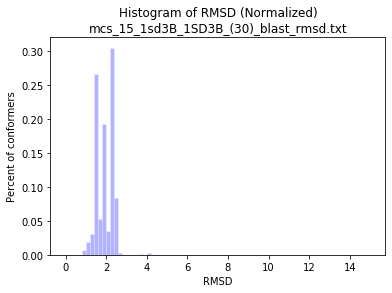

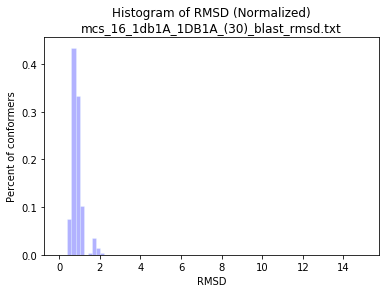

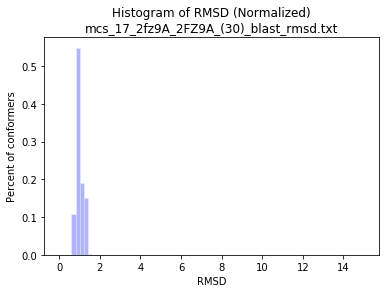

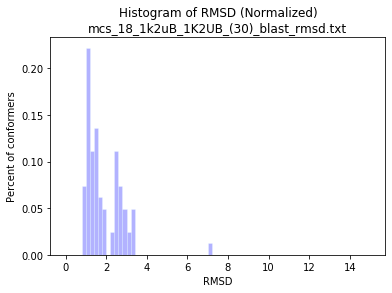

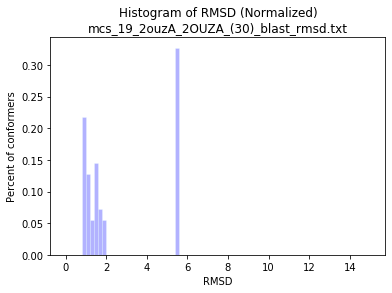

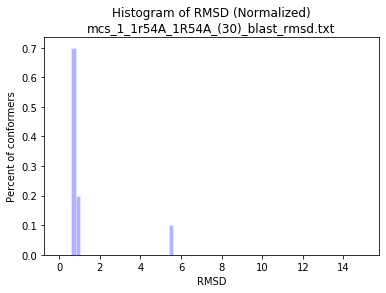

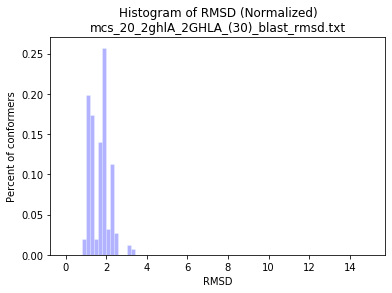

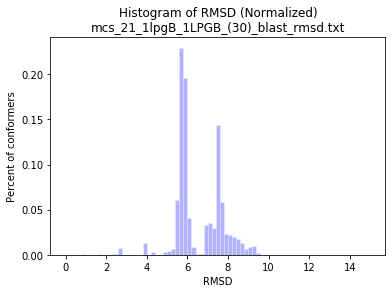

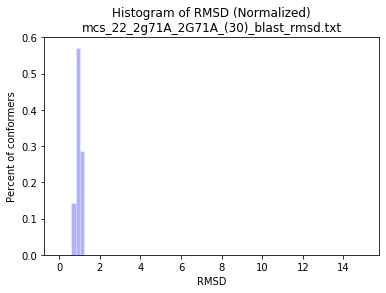

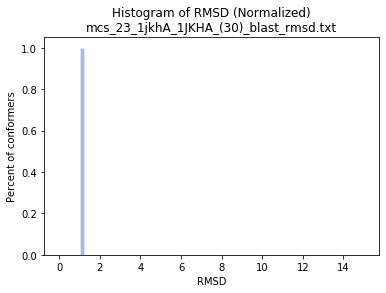

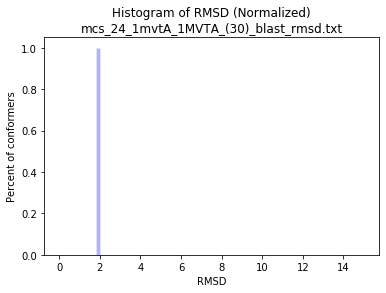

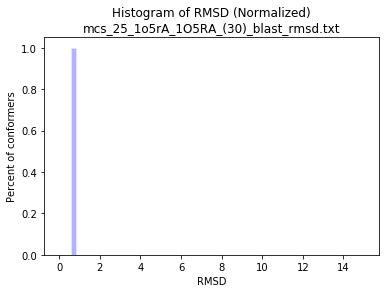

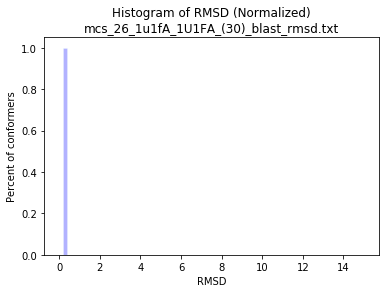

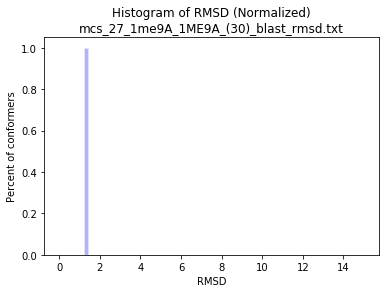

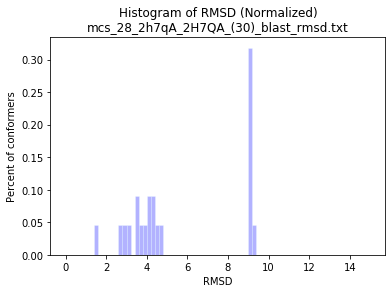

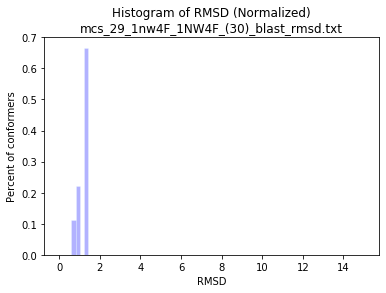

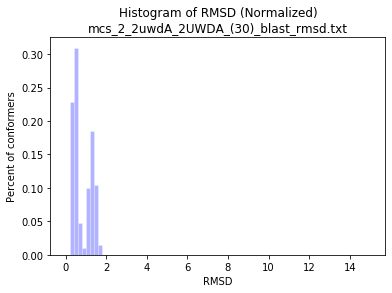

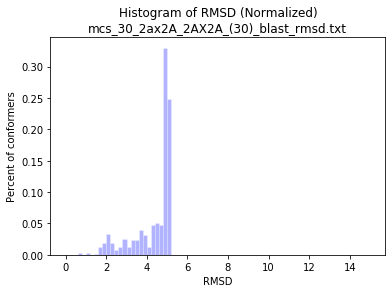

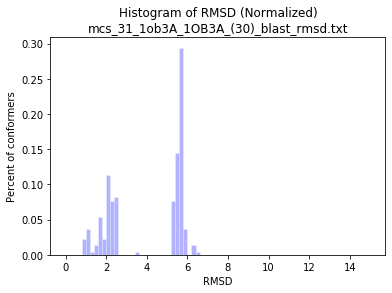

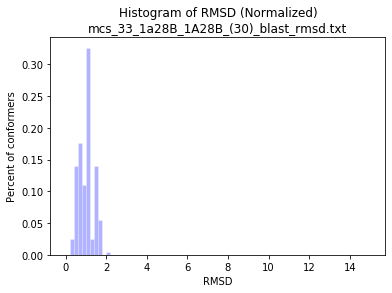

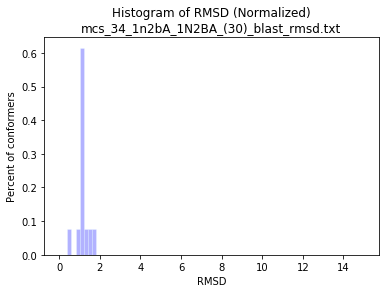

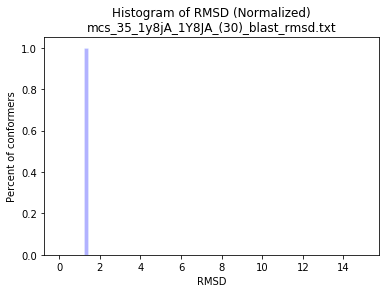

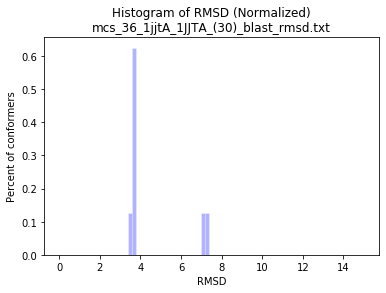

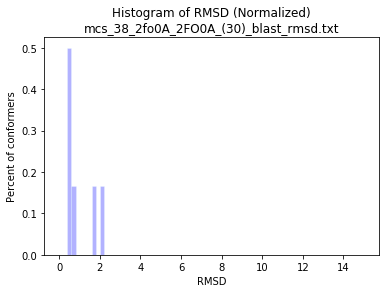

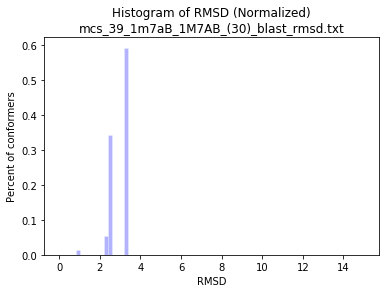

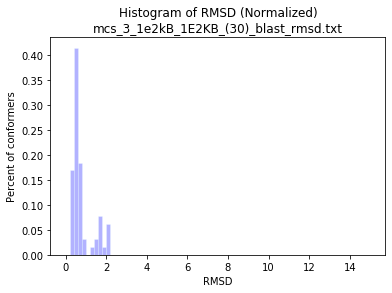

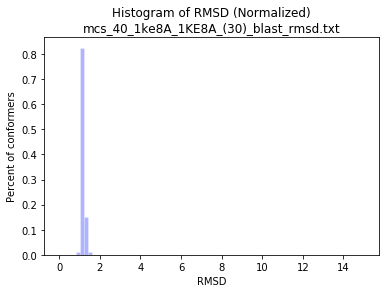

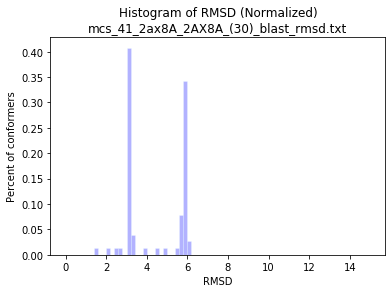

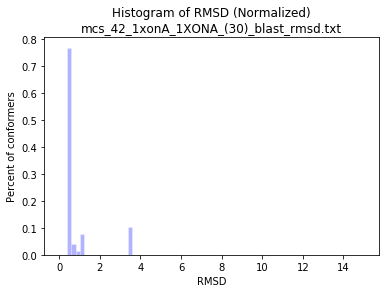

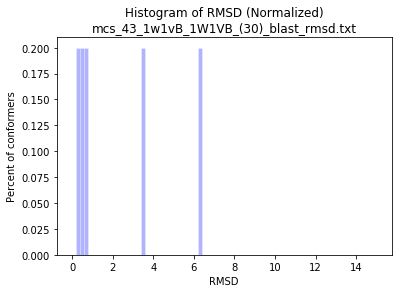

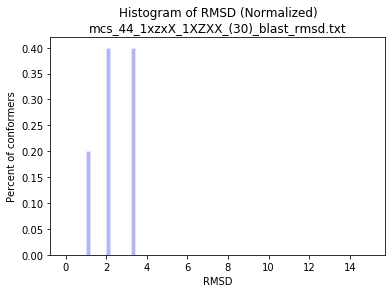

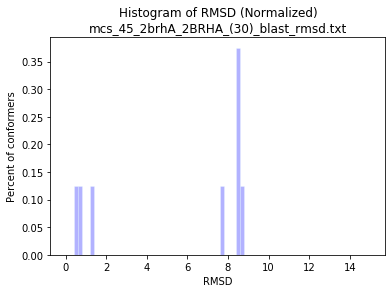

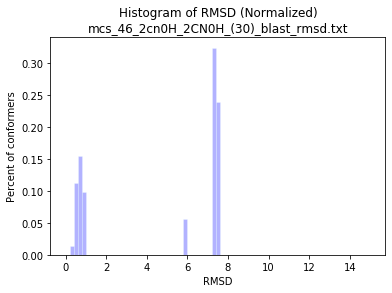

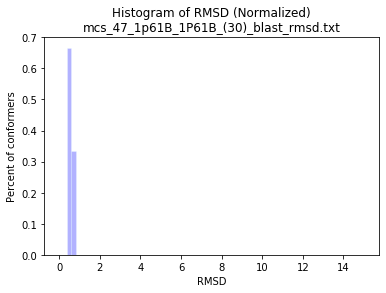

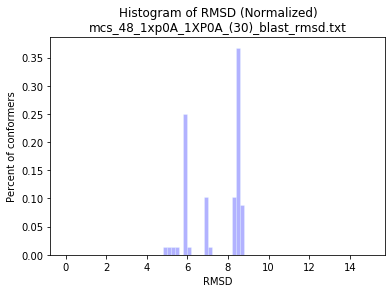

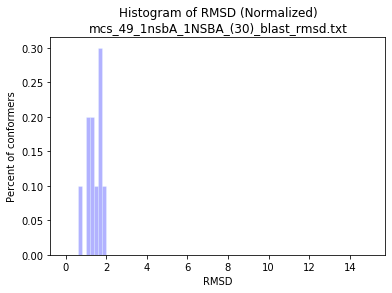

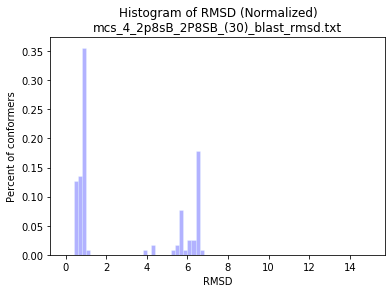

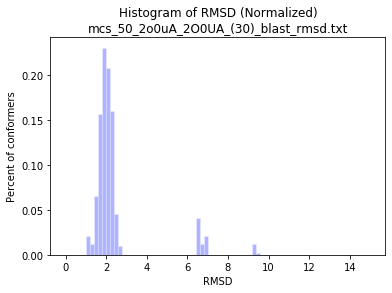

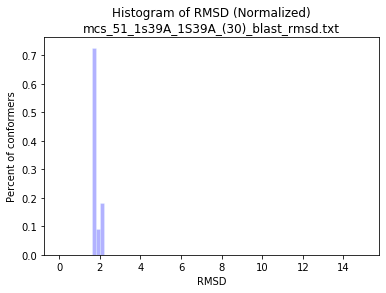

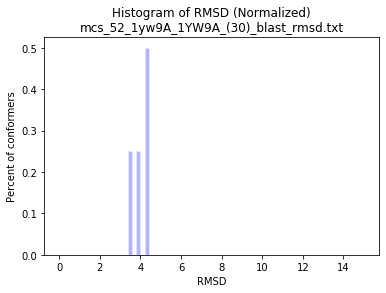

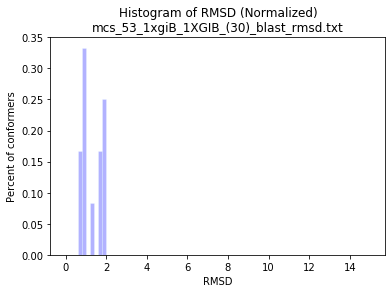

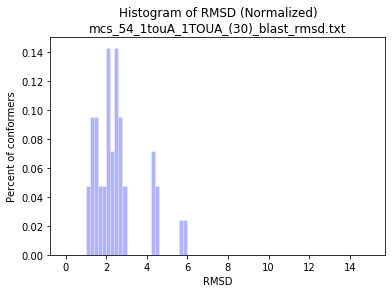

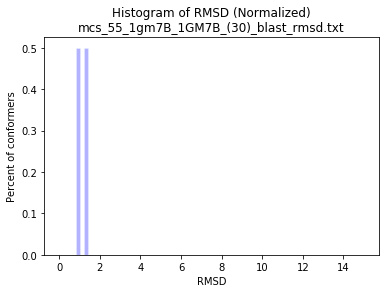

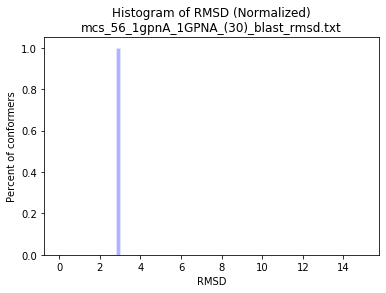

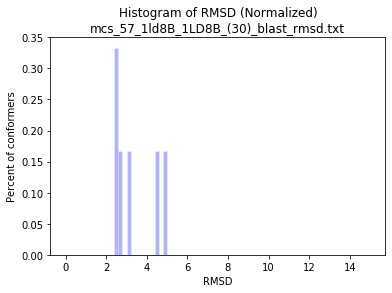

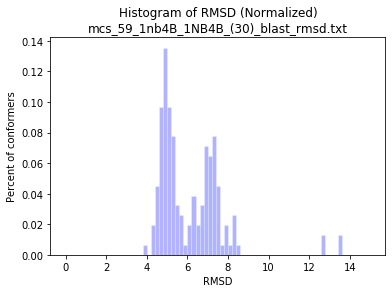

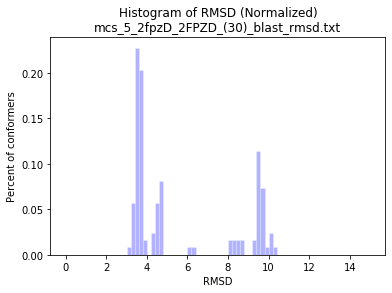

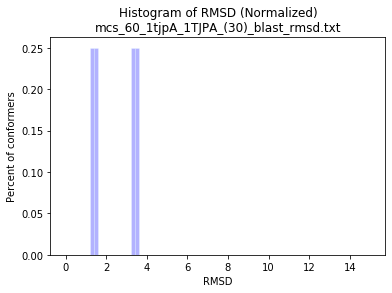

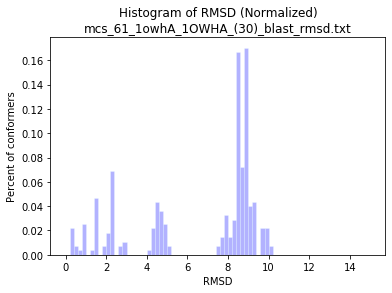

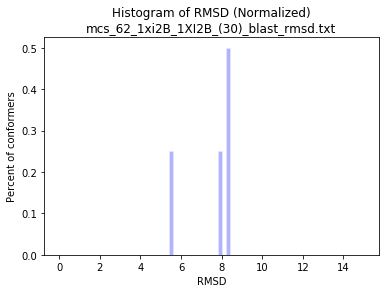

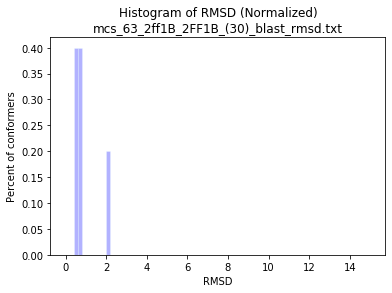

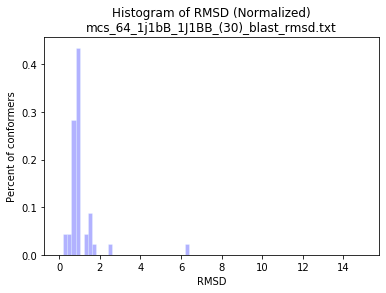

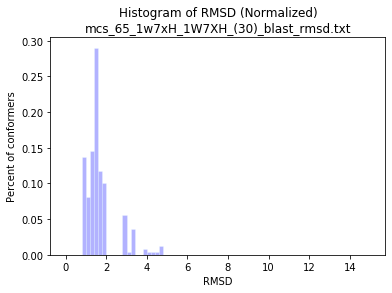

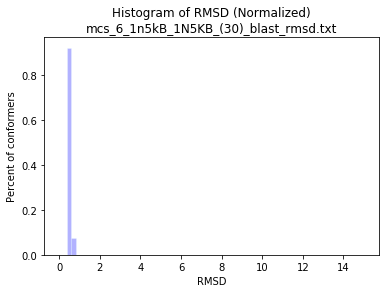

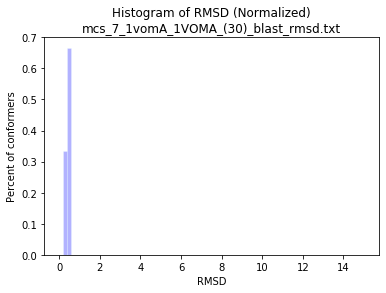

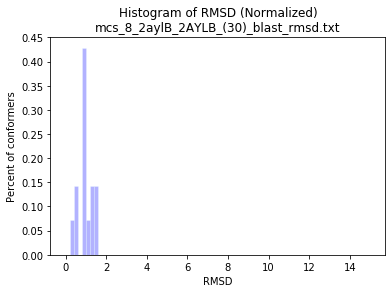

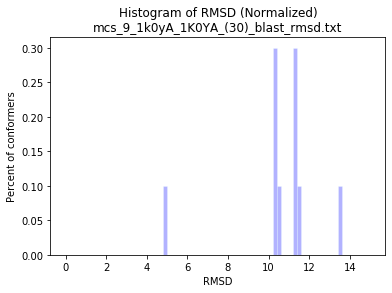

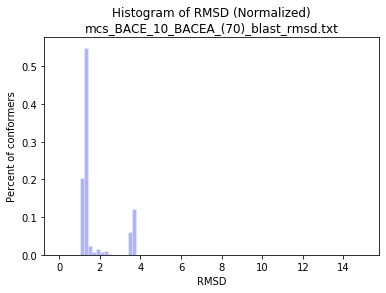

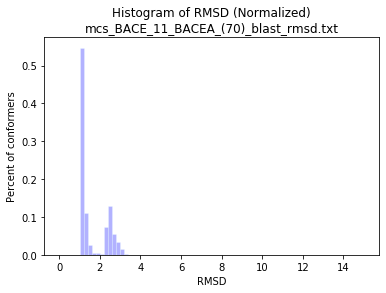

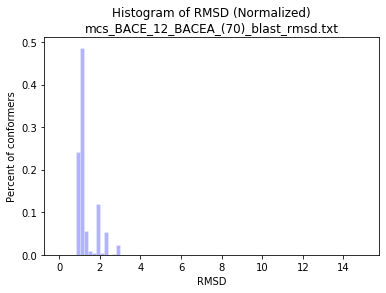

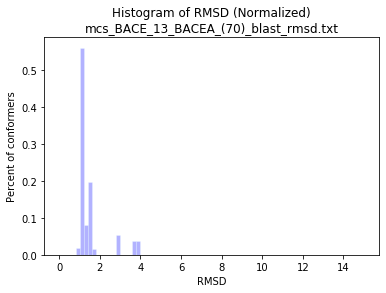

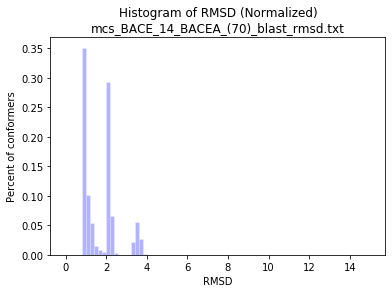

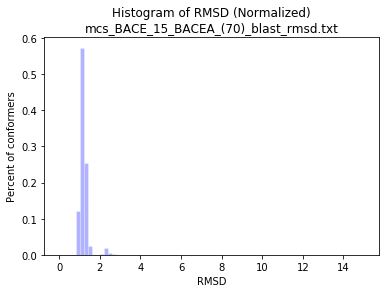

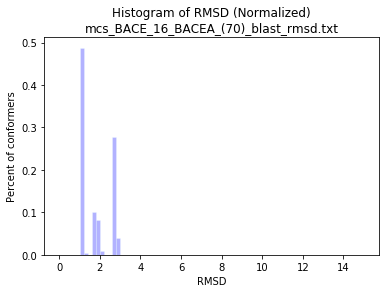

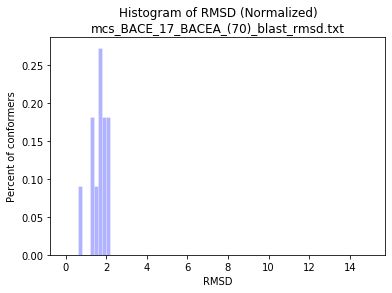

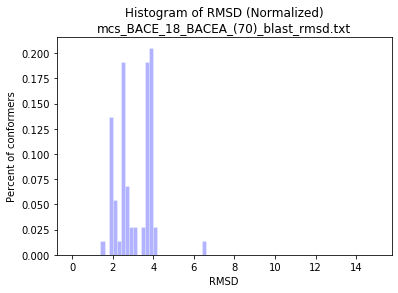

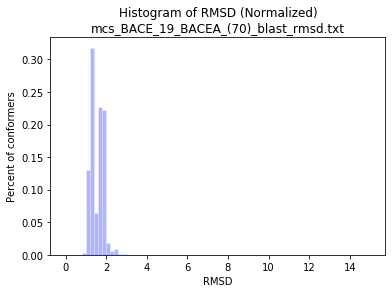

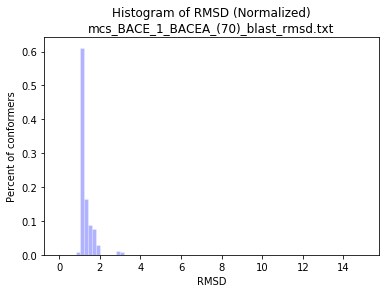

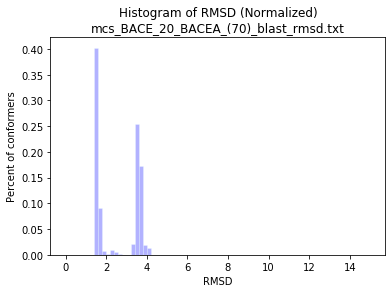

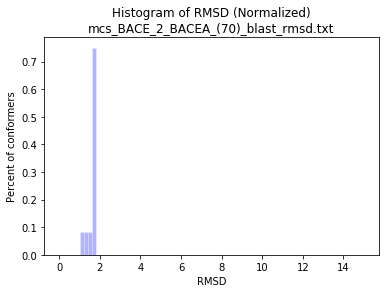

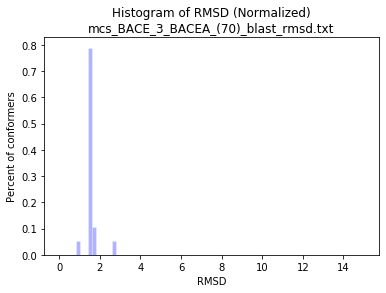

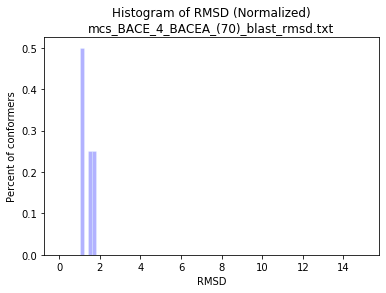

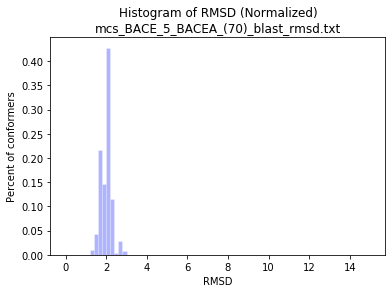

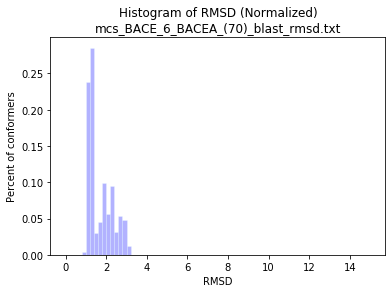

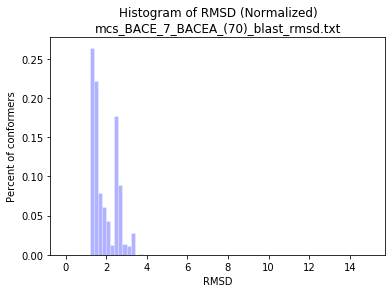

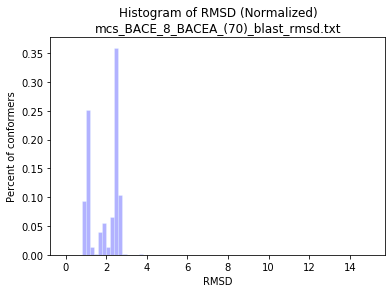

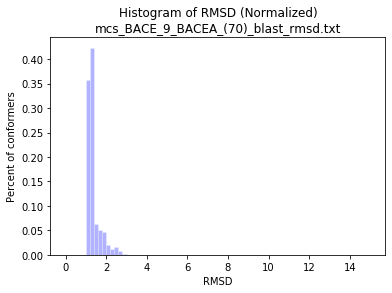

In [6]:
for rmsds, name in zip(rmsd_cat,name_cat):
    h = np.histogram(rmsds,num_bins,r)
    bcy = (h[0]/np.sum(h[0]))
    bcx = [x for x in h[1][:-1]]
    plt.bar(bcx, bcy,facecolor='blue', alpha=0.3,align = 'edge',width=1/freq_cf,edgecolor = 'azure')
    plt.title(f'Histogram of RMSD (Normalized)\n{name}')
    plt.ylabel('Percent of conformers')
    plt.xlabel('RMSD')
    plt.show()